# Scikit Learn
... mit der Bibliothek scitkit-learn können wir viele Prozesse, Modelle und Datenvorverarbeitungsschritte auf konfortabel in wenigen Zeilen Code durchführen

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Zum Warmwerden: Lineare Regression mit Scikit Learn

In [2]:
# Diese Funktion beschreibt unsere "Ideal-linie"
def h_to_grade(h_in_fb:float) -> float:
    # f(x) = mx + n  (Geradengleichung: Kennt Ihr noch?! :-)
    # Frage: Wieso 5 / 24 ? Wieso + 1
    return 5./24. * h_in_fb + 1.

In [3]:
# Wir erzeugen uns einen Datensatz
datapoints = 300
# liste mit 200 Werten zwischen 0 24 erstellen
xs = np.random.rand(datapoints) * 24.
# Funktionswerte berechnen "list comprehension"
ys = [h_to_grade(x) for x in xs]
# Datenpunkte etwas "schütteln"
ys += np.random.normal(scale=.2, size=len(ys))

# oben und unten abschneiden
ys[ys > 6] = 6. # Das ist ein numpy Feature
ys[ys < 1] = 1. # Lies: alle ys an denen y < 1 auf 1 setzen

xs_with_bias = np.c_[np.ones(len(xs)), xs]

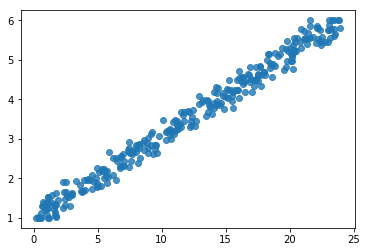

In [4]:
sns.regplot(x=xs, y=ys, fit_reg=False)

In [5]:
# import des LinearRegression Models
from sklearn.linear_model import LinearRegression

In [6]:
# Wir erstellen ein LinearRegressionModel und 
# "fitten" / "lernen" es an unseren Datensatz
model = LinearRegression(fit_intercept=False).fit(X=xs_with_bias, y=ys)

In [7]:
# Wir können uns die Koeffizienten ausgeben lassen
model.coef_

array([0.99760479, 0.20858309])

In [8]:
# ... und neue Datenpunkte vorhersehen lassen
print("Zensur nach 1 Stunde FB / Tag:", model.predict(X=[[1, 2]]))
print("Zensur nach 20 Stunden FB / Tag:", model.predict(X=[[1, 20]]))

Zensur nach 1 Stunde FB / Tag: [1.41477097]
Zensur nach 20 Stunden FB / Tag: [5.16926658]


## Setzen wir einfach ein anderes Modell ein

In [9]:
from sklearn.linear_model import ElasticNet

In [10]:
elastic_net = ElasticNet(fit_intercept=True).fit(X=xs.reshape(-1,1), y=ys)
print(elastic_net.coef_)
print(elastic_net.intercept_)

[0.19650816]
1.1432152282089736


In [11]:
# ... und neue Datenpunkte vorhersehen lassen
print("Zensur nach 1 Stunde FB / Tag:", elastic_net.predict(X=[[1]]))
print("Zensur nach 20 Stunden FB / Tag:", elastic_net.predict(X=[[20]]))

Zensur nach 1 Stunde FB / Tag: [1.33972339]
Zensur nach 20 Stunden FB / Tag: [5.07337843]


# MNIST
das MNIST ist ein bekannter Datensatz, welcher häufig verwendet wird, um Klassifikatoren zu testen. Dabei handelt es sich um kleine Bilder von Zahlen zwischen 0 und 9, welche korrekt klassifiziert werden sollen

In [12]:
# Dieser Code dient zum (down)loaden der MNIST Daten
def download_mnist():
    from six.moves import urllib
    from sklearn.datasets import fetch_mldata
    import os
    try:
        mnist = fetch_mldata('MNIST original')
    except urllib.error.HTTPError as ex:
        print("Could not download MNIST data from mldata.org, trying alternative...")

        # Alternative method to load MNIST, if mldata.org is down
        from scipy.io import loadmat
        mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
        mnist_path = "./mnist-original.mat"
        if not os.path.isfile(mnist_path):
            response = urllib.request.urlopen(mnist_alternative_url)
            with open(mnist_path, "wb") as f:
                content = response.read()
                f.write(content)
        mnist_raw = loadmat(mnist_path)
        mnist = {
            "data": mnist_raw["data"].T,
            "target": mnist_raw["label"][0],
            "COL_NAMES": ["label", "data"],
            "DESCR": "mldata.org dataset: mnist-original",
        }
        print("Success!")

        return mnist

In [13]:
mnist = download_mnist()

Could not download MNIST data from mldata.org, trying alternative...
Success!


## Wir werfen einen ersten Blick in die Daten

In [14]:
print('Vorhandene Daten:    ', mnist.keys())
print('Beschreibung:        ', mnist['DESCR'])
print('Target / Labels:     ', mnist['target'])
print('Datenformat:         ', mnist['data'].shape)
print('Daten:               \n', mnist['data'])

Vorhandene Daten:     dict_keys(['data', 'target', 'COL_NAMES', 'DESCR'])
Beschreibung:         mldata.org dataset: mnist-original
Target / Labels:      [0. 0. 0. ... 9. 9. 9.]
Datenformat:          (70000, 784)
Daten:               
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


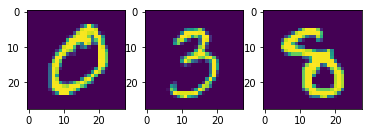

In [15]:
fig, ax = plt.subplots(1, 3)
plt.sca(ax[0])
plt.imshow(mnist['data'][0].reshape(28, 28))
plt.sca(ax[1])
plt.imshow(mnist['data'][20000].reshape(28, 28))
plt.sca(ax[2])
plt.imshow(mnist['data'][50000].reshape(28, 28))

... Wir sollten uns auch einmal die Verteilung der Labels anschauen

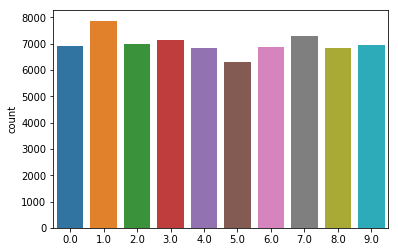

In [16]:
sns.countplot(mnist['target'],)

In [17]:
print("#Datensätze = #Labels?:", len(mnist['target']) == len(mnist['data']))

#Datensätze = #Labels?: True


## Aufteilen unserer Daten in Trainings und Testset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test  = train_test_split(mnist['data'], mnist['target'], 
                                                     train_size=0.67, test_size=0.33,
                                                     random_state=101)

In [20]:
print("Größe Trainingsset: ", len(X_train))
print("Größe Testset:      ", len(X_test))

Größe Trainingsset:  46900
Größe Testset:       23100


## Training des ersten Models

In [21]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Wenden wir unser Model auf beide Datensätze an

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

... und lassen uns das Performancemaß MSE ausgeben, wie in vorherigem Beispiel

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
print("Fehler auf Trainingsset: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print("Fehler auf Testset:      ", mean_squared_error(y_true=y_test, y_pred=y_test_pred))

Fehler auf Trainingsset:  3.1746152547489945
Fehler auf Testset:       3276528059972291.0


Das sieht ja ziemlich mieß aus. 
Warum? Wir verwenden eine vollkommen falschen Modelltypen: Wir wollen Klassifizieren, aber verwenden ein Regressionsmodell.
Merke: Überlege dir VORHER, welche Art von Problem wir vorliegen haben.

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(solver="lbfgs").fit(X=X_train, y=y_train)

In [27]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("Accuracy auf Trainingsset: {:.2f}%".format(accuracy_score(y_true=y_train, y_pred=y_train_pred)*100))
print("Accuracy auf Testset:      {:.2f}%".format(accuracy_score(y_true=y_test, y_pred=y_test_pred)*100))

Accuracy auf Trainingsset: 92.80%
Accuracy auf Testset:      91.56%


In [30]:
print("Vorhersagen:", y_test_pred[:20])
print("Labels:     ", y_test[:20])

Vorhersagen: [1. 5. 8. 1. 4. 7. 7. 1. 8. 2. 2. 7. 9. 8. 9. 6. 3. 9. 8. 3.]
Labels:      [1. 8. 8. 1. 4. 7. 7. 9. 8. 2. 3. 7. 9. 8. 9. 6. 3. 9. 8. 3.]


## Modeldiagnose

### Confusion Matrix
Gibt uns einen Einblick in jede Klasse unseres Modells. Hiermit lässt sich leicht feststellen, welche Klassen häufig mit einer anderen Klasse verwechselt werden, welche Klassen generell schwieriger oder leichter sind etc.

In [31]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [32]:
pd.DataFrame(confusion_matrix(y_pred=y_test_pred, y_true=y_test))

0     1     2     3     4     5     6     7     8     9
0  2186     0    10     4     2     7    13     1    23     3
1     1  2512    15     8     2    10     3     4    28     4
2    25    38  2025    27    28     9    30    24    70     9
3     8    11    52  2125     3    72    11    14    59    18
4    10     6     8     5  2079     8    18     7    21    91
5    15    13    12    71    29  1735    52    10    73    37
6    19     6    19     0    11    33  2185     1    12     1
7    13    10    30     6    25     3     1  2257    11    71
8    16    46    30    60    11    71    17    15  1974    38
9    18     8    13    30    60    10     1    71    30  2073

Diese Matrix kann schnell übersichtlich werden. Aber wir können Sie natürlich auch grafisch darstellen.
Dafür eignet sich eine sogenannte "Heatmap"

In [33]:
# Zuerst normalisieren wir jede Zeile
conf_mat = confusion_matrix(y_pred=y_test_pred, y_true=y_test)
row_sums = np.sum(conf_mat, axis=1) 
conf_mat = conf_mat / row_sums[:, np.newaxis] 
#... und entfernen jedes (i, i)-te Element
conf_mat -= np.eye(len(conf_mat)) * conf_mat

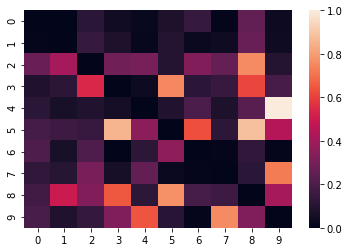

In [34]:
# und schlussendlich zeichnen wir das Ganze
# Die Berechnung dient lediglich dazu, den Wertebereich  
# zwischen 0..1 zu halten
sns.heatmap(conf_mat * 1/np.max(conf_mat))

### Classification report
Scikit's classification report gibt eine Übersicht über einige wichtige Informationstheoretische Größen: Precision, Recall, f1 Score.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_test_pred))

             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      2249
        1.0       0.95      0.97      0.96      2587
        2.0       0.91      0.89      0.90      2285
        3.0       0.91      0.90      0.90      2373
        4.0       0.92      0.92      0.92      2253
        5.0       0.89      0.85      0.87      2047
        6.0       0.94      0.96      0.95      2287
        7.0       0.94      0.93      0.93      2427
        8.0       0.86      0.87      0.86      2278
        9.0       0.88      0.90      0.89      2314

avg / total       0.92      0.92      0.92     23100



### ROC Curve
Die ROC Kurve gibt uns eine Übersicht über einen **binären Klassifikator**, welcher eine Konfidenz liefern kann. <br />
Die Grundüberlegung: Wenn unser Modell für die Erkennung der Zahl "0" für ein Sample 0.76 liefert, klassifizieren wir es dann als positiv (als 0) oder negativ (nicht null)? Hierfür benötigen wir einen **Threshold** (Grenzwert). Je niedriger dieser ist, desto öfter sagen wir positiv --> Recall steigt (Wir finden mehr 0-Samples) aber desto häufiger liegen wir auch falsch (Erkennen negative als Positiv; **False Positive Rate**). Dieses Verhältnis können wir plotten.

In [36]:
from sklearn.metrics import roc_curve

In [37]:
# Mit predict_proba kann ein Klassifikator statt der Klasse die propability ausgeben
# Das geht natürlich nur, wenn der Klassifikator das unterstützt
probs = model.predict_proba(X_test)
print("Prob. für Testsample 0: \n{}".format(probs[0]))

Prob. für Testsample 0: 
[4.50730833e-05 6.99689375e-01 1.89811207e-02 6.08213185e-02
 2.05995363e-02 1.29292757e-02 8.01561913e-05 9.43860009e-02
 7.97598546e-02 1.27082887e-02]


In [38]:
fpr8, tpr8, thresholds8 = roc_curve(y_true=y_test == 8, y_score=probs[:, 8])
fpr1, tpr1, thresholds1 = roc_curve(y_true=y_test == 1, y_score=probs[:, 1])

Text(0.5,1,'ROC Curve for class 8 and 1')

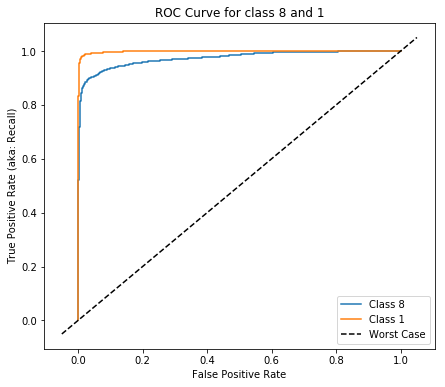

In [39]:
fig, ax = plt.subplots(1,1, figsize=(7, 6))
plt.sca(ax)
plt.plot(fpr8, tpr8)
plt.plot(fpr1, tpr1)
plt.plot([-0.05,1.05], [-0.05,1.05], color='black', linestyle="--")
plt.legend(['Class 8', "Class 1", "Worst Case"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (aka: Recall)")
plt.title("ROC Curve for class 8 and 1")

**Hinweis**: Je näher die Kurve an der linken oberen Ecke liegt, desto besser ist unser Klassifikator

Wollen wir uns doch einmal ein paar der Fehler anschauen...

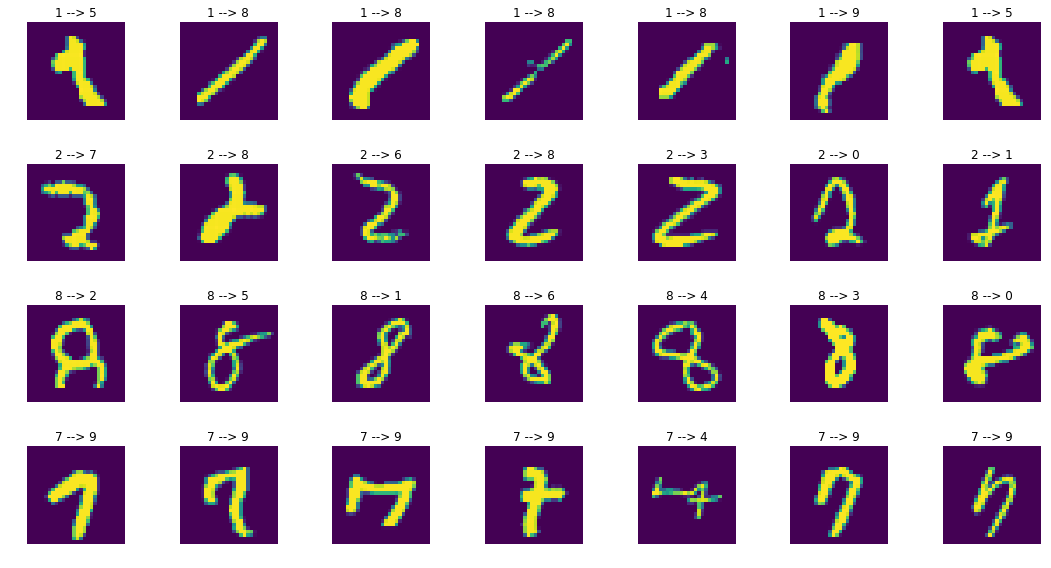

In [40]:
classes_to_inspect = [1, 2, 8, 7]
samples_per_class = 7
fig, ax = plt.subplots(nrows=len(classes_to_inspect), ncols=samples_per_class, figsize=(15,8))
for i1, cls in enumerate(classes_to_inspect):
    for i2 in range(samples_per_class):
        plt.sca(ax[i1, i2])
        possible_wrong_samples = (y_train == cls) & (y_train != y_train_pred)
        possible_indices = [index for index, boolean in enumerate(possible_wrong_samples) if boolean == True]
        rand_ind = np.random.choice(possible_indices)
        plt.imshow(X_train[rand_ind].reshape(28, 28))
        plt.title("{} --> {}".format(int(y_train[rand_ind]), int(y_train_pred[rand_ind])))
        plt.axis('off')
plt.tight_layout()

Werfen wir doch einmal einen Blick in den Klassifikator selbst

C:\Users\Richard\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


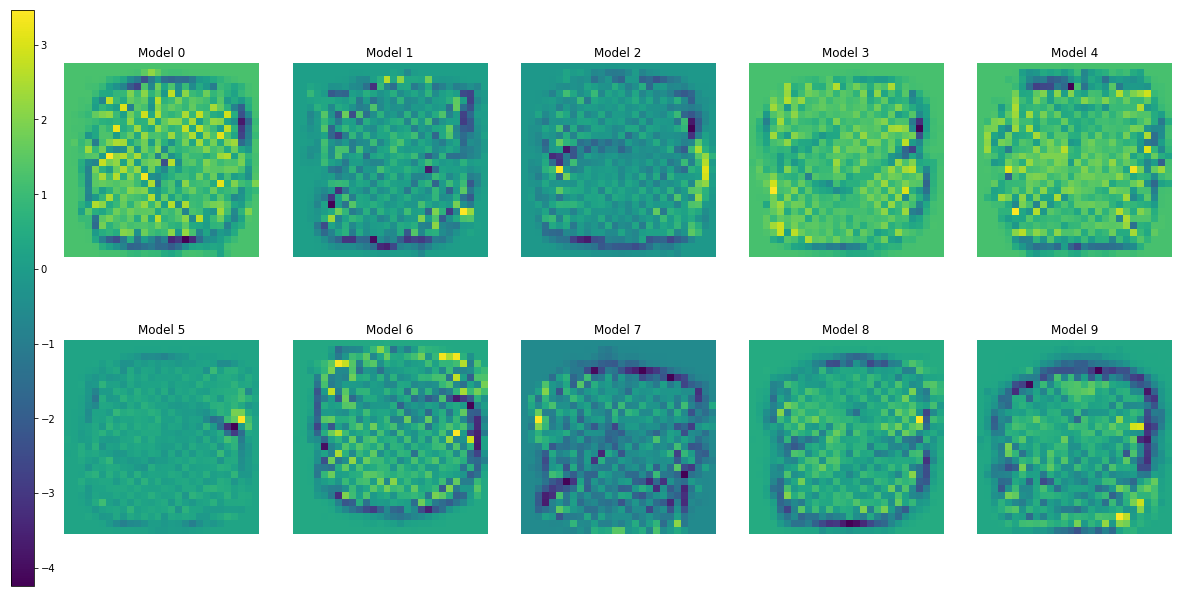

In [41]:
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(16, 8))
for i in range(0, 10):
    plt.axis('off')
    coef = model.coef_[i]
    plt.sca(ax[i // 5, i % 5])
    plt.imshow(StandardScaler().fit_transform(coef.reshape(-1, 1)).reshape(28, 28))
    plt.title("Model {}".format(i))
    
cbaxes = fig.add_axes([-0.02, 0, 0.02, 1]) 
plt.colorbar(orientation='vertical', cax=cbaxes)

plt.tight_layout()

## Modeltuning

### 1. Versuch: Sample-Gewichte anpassen

In [59]:
# Alle Fehldiagnosen vom ersten Versuch höher gewichten
weights = np.ones(len(y_train), dtype=np.float32)
weights[y_train != y_train_pred] = 3.

In [60]:
# Logistic Regression kann man Gewichten umgehen
model = LogisticRegression(solver='lbfgs')
model.fit(X=X_train, y=y_train, sample_weight=weights)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
y_train_pred_weighted = model.predict(X_train)
y_test_pred_weighted = model.predict(X_test)

In [62]:
print("Accuracy auf Trainingsset: {:.2f}%".format(accuracy_score(y_true=y_train, 
                                                                 y_pred=y_train_pred_weighted)*100))
print("Accuracy auf Trainingsset: {:.2f}%".format(accuracy_score(y_true=y_test, 
                                                                 y_pred=y_test_pred_weighted)*100))

Accuracy auf Trainingsset: 92.49%
Accuracy auf Trainingsset: 91.02%


### 2. Versuch: Klassengewichte anpassen
in diesem Beispiel übertreiben wir das Ganze ein Wenig um den Effekt besser sehen zu können!
Schaue Dir dazu den classification report an (Speziell für Klasse 8)

In [46]:
# Alle Fehldiagnosen vom ersten Versuch höher gewichten
class_weights = {cls: 1 if cls != 8 else 100 for cls in range(10)}
# Logistic Regression kann man Gewichten umgehen
model = LogisticRegression(solver='lbfgs', class_weight=class_weights)
model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0,
          class_weight={0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 100, 9: 1},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [47]:
y_train_pred_class_weighted = model.predict(X_train)
y_test_pred_class_weighted = model.predict(X_test)

In [48]:
print("Accuracy auf Trainingsset: {:.2f}%".format(accuracy_score(y_true=y_train, 
                                                                 y_pred=y_train_pred_class_weighted)*100))
print("Accuracy auf Trainingsset: {:.2f}%".format(accuracy_score(y_true=y_test, 
                                                                 y_pred=y_test_pred_class_weighted)*100))

Accuracy auf Trainingsset: 83.99%
Accuracy auf Trainingsset: 82.96%


In [49]:
print(classification_report(y_true=y_test, y_pred=y_test_pred_class_weighted))

             precision    recall  f1-score   support

        0.0       0.96      0.93      0.95      2249
        1.0       0.97      0.89      0.93      2587
        2.0       0.94      0.78      0.85      2285
        3.0       0.95      0.75      0.84      2373
        4.0       0.95      0.84      0.89      2253
        5.0       0.92      0.57      0.71      2047
        6.0       0.96      0.88      0.92      2287
        7.0       0.95      0.89      0.92      2427
        8.0       0.43      0.99      0.60      2278
        9.0       0.92      0.74      0.82      2314

avg / total       0.90      0.83      0.84     23100



### 2. Versuch: Modelparameter anpassen
Die meißten Modelle lassen sich über eine Vielzahl von Parametern beeinflussen.
Sogar ein einfaches Modell wie die Logistic Regression kann "getuned" werden

In [52]:
# Wir können uns die Verfügbaren parameter anschauen
# In scikit get das besonders einfach: Wir können uns die verfügbaren  Model-Parameter
# mit .get_params() anzeigen lassen
model = LogisticRegression()
params = model.get_params()
pd.DataFrame([list(params.values())], columns=list(model.get_params().keys()))

C class_weight   dual  fit_intercept  intercept_scaling  max_iter  \
0  1.0         None  False           True                  1       100   

  multi_class  n_jobs penalty random_state     solver     tol  verbose  \
0         ovr       1      l2         None  liblinear  0.0001        0   

   warm_start  
0       False

In [54]:
parameter_grid = {'C': [0.25, 0.5, 1., 2], 
                  'tol': [1e-4 / 2, 1e-4 // 4, 1e-4, 1e-4**2, 1e-4**4], 
                  'max_iter': [25, 50, 100, 200, 300],
                  'penalty': ['l2'],
                  'solver': ['lbfgs']
                 }

In [51]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(LogisticRegression(), param_grid=parameter_grid, verbose=3, n_jobs=1, vali)

In [75]:
model.fit(X=X_train, y=y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=5e-05 ........
[CV]  C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=5e-05, score=0.9095094967065294, total=   8.1s
[CV] C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=5e-05 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV]  C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=5e-05, score=0.9086547687583957, total=   8.2s
[CV] C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=5e-05 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.7s remaining:    0.0s


[CV]  C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=5e-05, score=0.9115802943058221, total=   8.1s
[CV] C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0 ..........
[CV]  C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0, score=0.9095094967065294, total=   8.2s
[CV] C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0 ..........
[CV]  C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0, score=0.9086547687583957, total=   8.2s
[CV] C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0 ..........
[CV]  C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0, score=0.9115802943058221, total=   8.7s
[CV] C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0001 .......
[CV]  C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9095094967065294, total=   8.8s
[CV] C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0001 .......
[CV]  C=0.25, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9086547687583957, total=   9.4s
[CV] C=0.25, max_iter=25,

[CV]  C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0, score=0.9026028010487945, total=  53.6s
[CV] C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0 .........
[CV]  C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0, score=0.9049446683298151, total=  53.0s
[CV] C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0 .........
[CV]  C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0, score=0.9069097888675623, total=  52.1s
[CV] C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001 ......
[CV]  C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9026028010487945, total=  51.6s
[CV] C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001 ......
[CV]  C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9049446683298151, total=  51.2s
[CV] C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001 ......
[CV]  C=0.25, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9069097888675623, total=  52.6s
[CV] C=0.25, max_i

[CV]  C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0, score=0.9087827032559329, total=  14.9s
[CV] C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0 ...........
[CV]  C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0, score=0.9099808061420346, total=  15.1s
[CV] C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001 ........
[CV]  C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9081025772206945, total=  14.7s
[CV] C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001 ........
[CV]  C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9087827032559329, total=  14.8s
[CV] C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001 ........
[CV]  C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9099808061420346, total=  14.9s
[CV] C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-08 .........
[CV]  C=0.5, max_iter=50, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9081025772206945, total=  14.3s
[CV] C=0.5, max_iter=50, pen

[CV]  C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0, score=0.9079334612923864, total= 2.1min
[CV] C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001 .......
[CV]  C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9018993413058771, total= 1.9min
[CV] C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001 .......
[CV]  C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9035373888569053, total= 2.4min
[CV] C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001 .......
[CV]  C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9079334612923864, total= 2.2min
[CV] C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-08 ........
[CV]  C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9018993413058771, total= 2.0min
[CV] C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-08 ........
[CV]  C=0.5, max_iter=300, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9035373888569053, total= 1.3min
[CV] C=0.5, max_iter

[CV]  C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001, score=0.905224787363305, total=  27.8s
[CV] C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001 .......
[CV]  C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001, score=0.905840209812576, total=  24.6s
[CV] C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001 .......
[CV]  C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9080614203454894, total=  25.7s
[CV] C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-08 ........
[CV]  C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-08, score=0.905224787363305, total=  24.7s
[CV] C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-08 ........
[CV]  C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-08, score=0.905840209812576, total=  24.2s
[CV] C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-08 ........
[CV]  C=1.0, max_iter=100, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9080614203454894, total=  26.4s
[CV] C=1.0, max_iter=1

[CV]  C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9086547687583957, total=  15.7s
[CV] C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0001 ..........
[CV]  C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=0.0001, score=0.9115802943058221, total=  15.4s
[CV] C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=1e-08 ...........
[CV]  C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9095094967065294, total=  15.5s
[CV] C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=1e-08 ...........
[CV]  C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9086547687583957, total=  16.0s
[CV] C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=1e-08 ...........
[CV]  C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9115802943058221, total=  16.4s
[CV] C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=1.0000000000000002e-16 
[CV]  C=2, max_iter=25, penalty=l2, solver=lbfgs, tol=1.0000000000000002e-16, score=0.9095094967065294, total=  16.2s
[CV] C=2, max_

[CV]  C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9034981134488713, total=  44.3s
[CV] C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-08 ..........
[CV]  C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9056483080662701, total=  44.0s
[CV] C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-08 ..........
[CV]  C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1e-08, score=0.9071017274472168, total=  44.2s
[CV] C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1.0000000000000002e-16 
[CV]  C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1.0000000000000002e-16, score=0.9034981134488713, total=  44.0s
[CV] C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1.0000000000000002e-16 
[CV]  C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1.0000000000000002e-16, score=0.9056483080662701, total=  44.4s
[CV] C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1.0000000000000002e-16 
[CV]  C=2, max_iter=200, penalty=l2, solver=lbfgs, tol=1.0000000000000002e-16, s

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 222.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.25, 0.5, 1.0, 2], 'tol': [5e-05, 0.0, 0.0001, 1e-08, 1.0000000000000002e-16], 'max_iter': [25, 50, 100, 200, 300], 'penalty': ['l2'], 'solver': ['lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [78]:
model.best_params_

{'C': 0.25, 'max_iter': 25, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 5e-05}

In [79]:
y_pred_grid = model.predict(X=X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_grid))

             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      2249
        1.0       0.95      0.97      0.96      2587
        2.0       0.92      0.89      0.90      2285
        3.0       0.91      0.90      0.90      2373
        4.0       0.92      0.92      0.92      2253
        5.0       0.88      0.84      0.86      2047
        6.0       0.94      0.95      0.95      2287
        7.0       0.93      0.94      0.94      2427
        8.0       0.85      0.86      0.86      2278
        9.0       0.89      0.88      0.89      2314

avg / total       0.91      0.91      0.91     23100



Wieder nicht wirklich besser :-( <br />
Warum?